# Importing Libraries

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

# Reading Data

In [2]:
df = pd.read_excel("customer_churn_large_dataset.xlsx")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [3]:
# understanding data for Nulls, DataTypes, amount of data
df.info()
# No Nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [4]:
# Checking if Data contains duplicated records excluding CustomerID & Name
df.iloc[:,2:].duplicated().sum()
# No duplicates

0

In [5]:
# Checking if Data is Balanced
df.Churn.value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [6]:
# Statistical analysis
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [7]:
df.sample(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
94280,94281,Customer_94281,32,Female,Los Angeles,21,40.59,443,0
57085,57086,Customer_57086,32,Female,Chicago,24,83.91,279,1
88421,88422,Customer_88422,60,Male,Los Angeles,20,32.57,484,0
39587,39588,Customer_39588,35,Male,New York,14,80.74,194,1
58943,58944,Customer_58944,21,Male,Chicago,3,92.09,370,0


# EDA

### Pie Chart

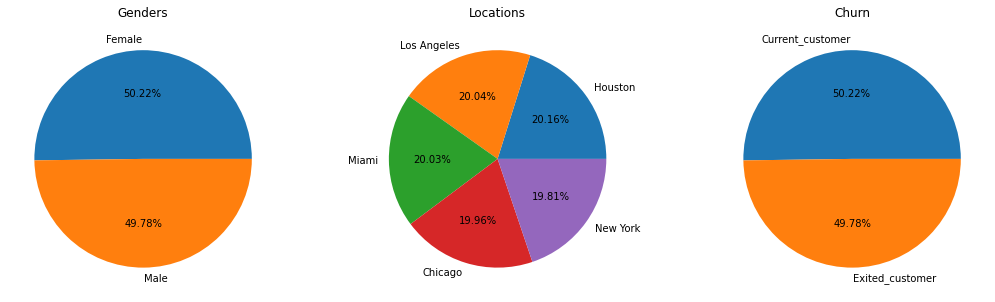

In [9]:
# Create a 1x4 grid of subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Checking if Gender is Balanced
ax[0].pie(df.Gender.value_counts(), autopct='%1.2f%%', labels=["Female", "Male"])
ax[0].set_title("Genders")

# Checking if Location is Balanced
ax[1].pie(df.Location.value_counts(), autopct='%1.2f%%', labels=df.Location.value_counts().index)
ax[1].set_title("Locations")

# Checking if Churn is Balanced
ax[2].pie(df.Churn.value_counts(), autopct='%1.2f%%', labels=["Current_customer", "Exited_customer"])
ax[2].set_title('Churn')

plt.show()

### Location-Gender Distribution

<AxesSubplot:xlabel='Location', ylabel='Age'>

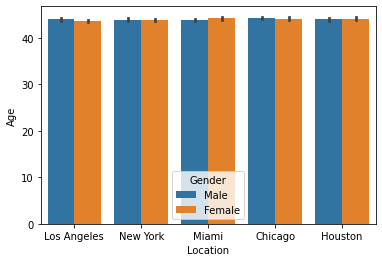

In [12]:
# Location wise frequency of Male & Female 
# [Los Angeles, Chicago --> More Male]
# [Miami --> More Male]
# [New York, Houston --> Equal Mail and Female]

sns.barplot(y='Age', x='Location', hue='Gender', data=df)

### Subscription Length & Monthly Bill

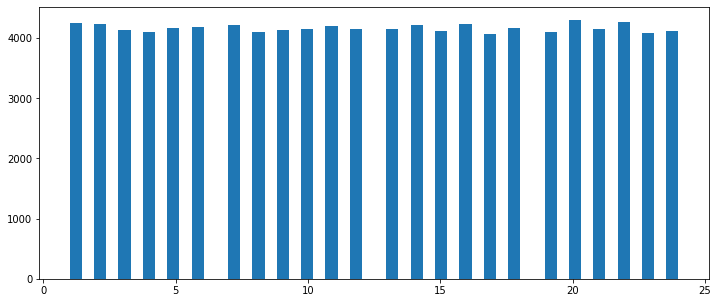

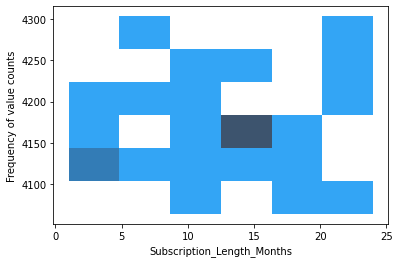

In [10]:
fig, ax = plt.subplots(1, figsize=(12, 5))

# Almost similar distribution in Subscription_Length_Months
plt.hist(df.Subscription_Length_Months, bins=50)
plt.show()

# distribution Monthly_Bill
Y_axis = df['Subscription_Length_Months'].value_counts(ascending=True)
X_axis = np.random.randint(1, 25,size=len(Y_axis))

plot  = sns.histplot(x=X_axis, y=Y_axis)
plot.set(xlabel='Subscription_Length_Months', ylabel='Frequency of value counts')

plt.show()

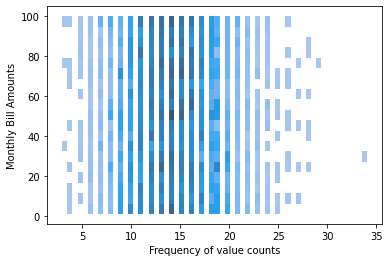

In [11]:
# distribution Monthly_Bill
X_axis = df['Monthly_Bill'].value_counts(ascending=True)
Y_axis = np.random.randint(1, 101,size=len(X_axis))

plot  = sns.histplot(x=X_axis, y=Y_axis)

plot.set(ylabel='Monthly Bill Amounts', xlabel='Frequency of value counts')

plt.show()

### similar user frequencies across groups for different features

<AxesSubplot:xlabel='Total_Usage_GB', ylabel='Density'>

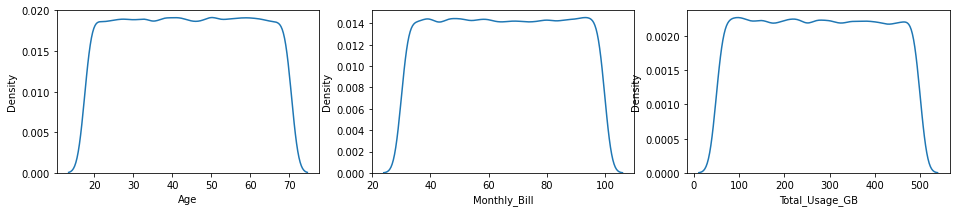

In [13]:
plt.figure(figsize=(16,3))
# Age group also has similar frequencies of users throughoyt the groups
plt.subplot(1,3,1)
sns.kdeplot(df["Age"])

# Monthly_Bill group also has similar frequencies of users throughoyt the groups
plt.subplot(1,3,2)
sns.kdeplot(df["Monthly_Bill"])

# Total_Usage_GB group also has similar frequencies of users throughoyt the groups
plt.subplot(1,3,3)
sns.kdeplot(df["Total_Usage_GB"])

### Heatmap: 

<AxesSubplot:>

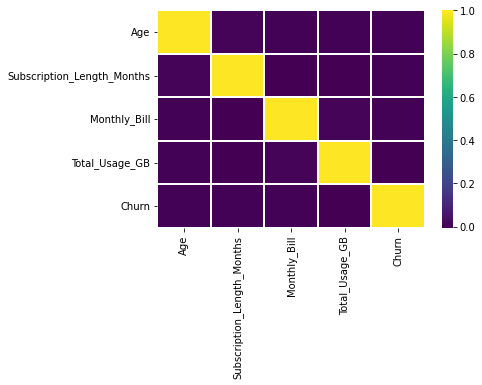

In [14]:
# Excluding  (CustomerID, Name) as they does not contribute in the prediction
sns.heatmap(df.iloc[:,2:].corr(), cmap="viridis", annot=False, linewidths=2, linecolor='white')

In [15]:
df.iloc[:,2:].corr()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
Age,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,0.001559,0.002328,-0.000211,-0.002842,1.000000


### Pair Plot

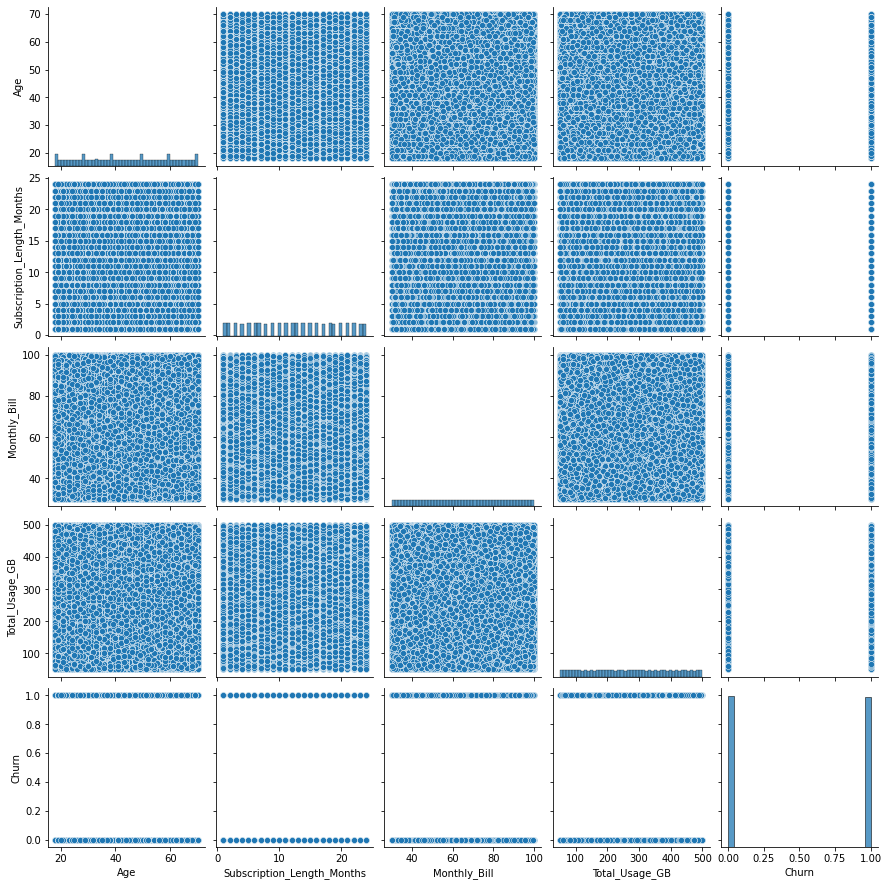

In [16]:
sns.pairplot(df.iloc[:,2:])